# konlpy를 활용한 형태소 분석

- 형태소란 단어를 더 이상 나눌 수 없는 단위로 나눠놓은 단어입니다.

- konlpy는 한국어 단어를 더 나눌 수 없는 단위로 쪼갤 수 있는 라이브러리입니다.

- 우리가 통상적으로 사용하는 한국어 문장을 형태소 단위로 나누는 작업이 선행되어야 워드클라우드를 사용할 수 있습니다.

- konlpy document 주소(https://konlpy-ko.readthedocs.io/ko/v0.4.3/)

In [1]:
# konlpy의 꼬꼬마 라이브러리를 사용해보겠습니다.
from konlpy.tag import Kkma

In [4]:
# 꼬꼬마 라이브러리 객체 생성
kkma = Kkma()

In [5]:
# 문장 단위 입력
kkma.sentences('설렁탕을 사왔는데 왜 먹지를 못하나...')

['설렁탕을 사 왔는데 왜 먹지를 못하나...']

In [6]:
# 명사 쪼개기
kkma.nouns("김첨지는 말했다. 설렁탕을 사왔는데 왜 먹지를 못하나...")

['김', '김첨지', '첨지', '설렁탕', '먹지']

In [7]:
# 전체 문장 형태소 얻기
kkma.pos('김첨지는 말했다. 설렁탕을 사왔는데 왜 먹지를 못하나...')

[('김', 'NNG'),
 ('첨지', 'NNG'),
 ('는', 'JX'),
 ('말하', 'VV'),
 ('었', 'EPT'),
 ('다', 'EFN'),
 ('.', 'SF'),
 ('설렁탕', 'NNG'),
 ('을', 'JKO'),
 ('사', 'VV'),
 ('아', 'ECS'),
 ('오', 'VX'),
 ('았', 'EPT'),
 ('는데', 'ECD'),
 ('왜', 'MAG'),
 ('먹지', 'NNG'),
 ('를', 'JKO'),
 ('못하', 'VX'),
 ('나', 'ECE'),
 ('...', 'SE')]

In [8]:
# 한나눔 라이브러리를 사용해보겠습니다.
from konlpy.tag import Hannanum

In [9]:
# 한나눔 객체 생성
hannanum = Hannanum()

In [10]:
# 한나눔에서 명사 쪼개기
hannanum.nouns('설렁탕을 사왔는데 왜 먹지를 못하나...')

['설렁탕', '먹지']

In [11]:
# 품사 표시 없이 문장 쪼개기
hannanum.morphs('설렁탕을 사왔는데 왜 먹지를 못하나...')

['설렁탕', '을', '사', '아', '오', '아ㄴ데', '왜', '먹지', '를', '못하', '어', '나', '아', '...']

In [12]:
# 품사표시와 함께 문장 쪼개기
hannanum.pos('김첨지는 말했다. 설렁탕을 사왔는데 왜 먹지를 못하나...')

[('김첨지', 'N'),
 ('는', 'J'),
 ('말', 'N'),
 ('하', 'X'),
 ('었다', 'E'),
 ('.', 'S'),
 ('설렁탕', 'N'),
 ('을', 'J'),
 ('사', 'P'),
 ('아', 'E'),
 ('오', 'P'),
 ('아ㄴ데', 'E'),
 ('왜', 'M'),
 ('먹지', 'N'),
 ('를', 'J'),
 ('못하', 'P'),
 ('어', 'E'),
 ('나', 'P'),
 ('아', 'E'),
 ('...', 'S')]

In [13]:
# Twitter 분석기 입니다.
from konlpy.tag import Twitter

In [14]:
# Twitter 분석기 객체 생성
t = Twitter()

E:\phs\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [15]:
# Twitter 명사 분석
t.nouns('설렁탕을 사왔는데 왜 먹지를 못하나...')

['설렁탕', '왜', '못', '하나']

In [16]:
# Twitter 형태소 분류
t.morphs('설렁탕을 사왔는데 왜 먹지를 못하나...')

['설렁탕', '을', '사왔는데', '왜', '먹지를', '못', '하나', '...']

In [17]:
# Twitter 현태소 및 성분 분류
t.pos('설렁탕을 사왔는데 왜 먹지를 못하나...')

[('설렁탕', 'Noun'),
 ('을', 'Josa'),
 ('사왔는데', 'Verb'),
 ('왜', 'Noun'),
 ('먹지를', 'Verb'),
 ('못', 'Noun'),
 ('하나', 'Noun'),
 ('...', 'Punctuation')]

# 워드 클라우드

- 워드 클라우드는 문장이나 글을 입력했을때 형태소 단위로 분석한 다음, 빈출단어 순으로 글꼴 크기를 다르게 해서 이미지화합니다.

- 시각적으로 빈출단어와 그렇지 않은 단어를 확인할 수 있도록 만들어주기 때문에 분석결과를 직관적으로 파악할 수 있습니다.

- 워드클라우드 공식 페이지(https://amueller.github.io/word_cloud/)를 참조해 워드클라우드 사용법을 파악해보겠습니다.

In [21]:
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pylab as plt

import numpy as np # 색깔을 숫자로 표현
from PIL import Image

### 스타워즈 시각화

- 스타워드 대본 및 스톰 트루퍼 사진을 활용한 워드클라우드화 및 그냥 시각화 두 가지를 진행해보겠습니다.

- 스톰 트루퍼 사진(흑백화 사진)을 사용하면 스톰 트루퍼 사진의 검은색 영역에만 워드클라우드가 형성됩니다.

<img src="stormtrooper.png" width="350" height="350">

In [22]:
# 스타워즈 텍스트 타일 내부의 문자들을 파이썬 문자열 자료로 변환
starwars = open('starwars.txt', encoding='utf-8').read()
print(starwars) # str

﻿                                        STAR WARS

                                        Episode IV

                                        A NEW HOPE

                                         From the
                                  JOURNAL OF THE WHILLS

                                            by
                                       George Lucas

                                   Revised Fourth Draft
                                     January 15, 1976

                                      LUCASFILM LTD.

                

               A long time ago, in a galaxy far, far, away...

               A vast sea of stars serves as the backdrop for the main title. 
               War drums echo through the heavens as a rollup slowly crawls 
               into infinity.

                    It is a period of civil war. Rebel spaceships, 
                    striking from a hidden base, have won their first 
                    victory against the evil Galactic Empire.

  

In [23]:
# 워드클라우드 만들때 제외할 단어 입력하기(제대로 작동 안함)
stopwords = set(STOPWORDS)
stopwords.add('int')
stopwords.add('ext')

In [38]:
# 배경 자료 주는 경우 추가할 내용
background = np.array(Image.open('stormtrooper.png'))
print(background) #

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [42]:
# 시각화 툴에 자료 집어넣기
# background_color : 배경색
# max_words : 최대 몇 글자로 클라우드를 구성할지
# mask : 베경에 사용할 그림 파일 정보
# stopwords : 그림 모서리 부분과 그림 시작점의 간격
# random_state : 그림 구성(숫자를 다르게 주면 단어 배치만 조금씩 바꿈)
# .generate(영문자료) : 어떤 영문자료를 활용해 워드클라우드를 구성할지

wc = WordCloud(background_color="white", max_words=1000, mask=background, stopwords = stopwords, margin=10, 
               random_state=7).generate(starwars)
# 글씨 색깔 지정
default_colors = wc.to_array()

### imshow의 interpolation

- 경계를 어떻게 표시할지 지정할때 interpolation을 사용함

https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/interpolation_methods.html

- 위 사이트에 옵션별 경계면 처리를 좀 더 상세히 확인 가능

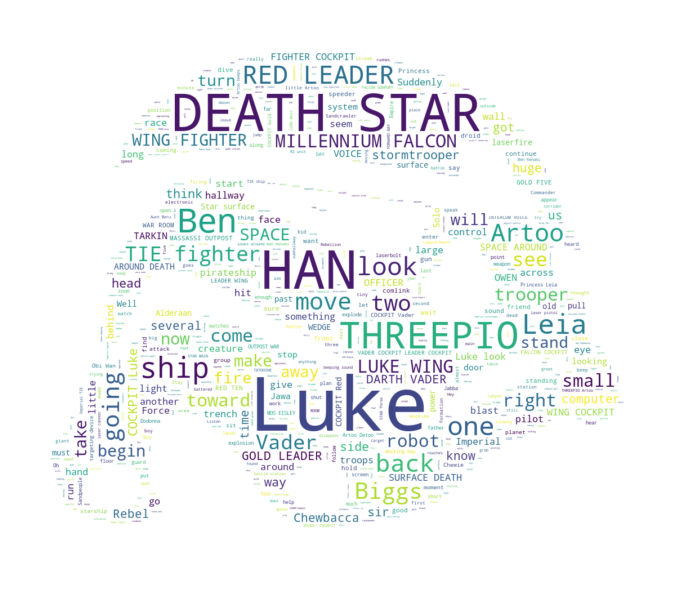

In [43]:
# 시각화한 자료 화면에 출력하기
# 12 * 12 크기로 출력
plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### 한국어를 이용한 워드클라우드

In [44]:
import nltk

# kobill은 한국어로 된 법조문 파일 10개를 담고 있는 라이브러리
from konlpy.corpus import kobill

In [45]:
# 법조문 파일 10개 로드
corp = kobill.fileids()
corp

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [46]:
# 위의 법조문 리스트 중 하나만 로드하기
doc_ko = kobill.open('1809896.txt').read()
doc_ko

'행정절차법 일부개정법률안\n\n(유선호의원 대표발의 )\n\n 의 안\n 번 호\n\n9896\n\n발의연월일 : 2010.  11.  15.\n\n발  의  자 : 유선호․강기갑․김효석  \n\n최문순ㆍ최재성ㆍ조영택  \n\n김성곤ㆍ문학진ㆍ백재현  \n\n송민순ㆍ양승조ㆍ신낙균  \n\n조배숙ㆍ박은수ㆍ정동영  \n\n김춘진ㆍ김재윤ㆍ우윤근  \n\n이성남ㆍ박영선 의원\n\n             (20인)\n\n제안이유\n\n  현행법은 입법예고와 행정예고를 통하여 정책 결정 과정에 국민 참\n\n여의 절차를 규정하고 있기는 하나 실제 정책 결정·집행·평가의 단계\n\n에서 근본적인 국민 참여 규정은 거의 없어 위임입법에 의하여 정책 \n\n결정 및 집행 권한이 부여되는 문제점이 있음.\n\n  따라서 입법예고 이전의 국민적 협의절차와 재입법예고 규정 등을 \n\n신설하고, 당사자 등의 개념을 명확히 하여 당사자의 신청에 의한 청\n\n문의 기회를 보장하는 한편, 법령상의 일부 미비점을 개선․보완함으\n\n- 1 -\n\n\x0c- 2 -\n\n로써 실질적인 국민 참여의 기회를 보장하여 행정에 대한 국민의 불\n\n신을 없애고 행정의 투명성을 확보하려는 것임.   \n\n주요내용\n\n  가. 법의 적용 제외 대상을 대통령령으로 정할 수 없게 하는 대신에 \n\n법에서 상세하게 규정하도록 함(안 제3조).\n\n  나. 당사자의 개념을 명확히 하고, 당사자의 신청에 의하여 청문을 \n\n실시할 수 있도록 함(안 제2조제4호, 제22조제1항제1호의2 신설). \n\n  다. 법제처장은 입법예고를 하지 아니한 법령안의 심사를 반려할 수 \n\n있도록 하고, 법령안 주관기관의 장은 입법예고 후 예고내용에 \n\n중요한 변경이 발생하거나 국민생활과 직접 관련되는 내용이 추\n\n가되는 경우에는 재입법예고를 하도록 함(안 제41조제4항 및 제5\n\n항 신설).\n\n  라. 입법예고기간과 행정예고기간을 50일 이상으로 연장함(안 제43\n\n조 및 제46조의2).\n

In [47]:
# t를 이용룔한 로직은 위에 이미 Twitter 로드가 되어있기 때문에 가능
token = t.nouns(doc_ko)
token

['행정절차법',
 '일부',
 '개정',
 '법률',
 '안',
 '유선호',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '유선호',
 '강기갑',
 '김효석',
 '최문순',
 '최재성',
 '조영택',
 '김성곤',
 '문학진',
 '백재현',
 '송민순',
 '양승조',
 '신낙균',
 '조배숙',
 '박은수',
 '정동영',
 '김춘진',
 '김재윤',
 '우윤근',
 '이성남',
 '박영선',
 '의원',
 '인',
 '제안',
 '이유',
 '현행법',
 '입법',
 '예고',
 '행정',
 '예고',
 '통',
 '정책',
 '결정',
 '과정',
 '국민',
 '여의',
 '절차',
 '규정',
 '하나',
 '실제',
 '정책',
 '결정',
 '집행',
 '평가',
 '단계',
 '근본',
 '국민',
 '참여',
 '규정',
 '거의',
 '위임입법',
 '정책',
 '결정',
 '및',
 '집행',
 '권한',
 '부여',
 '문제점',
 '따라서',
 '입법',
 '예고',
 '이전',
 '국민',
 '협의',
 '절차',
 '재',
 '입법',
 '예고',
 '규정',
 '등',
 '신설',
 '당사자',
 '등',
 '개념',
 '당사자',
 '신청',
 '청',
 '문의',
 '기회',
 '보장',
 '한편',
 '법령',
 '상의',
 '일부',
 '미비',
 '점',
 '개선',
 '보완',
 '로써',
 '실질',
 '국민',
 '참여',
 '기회',
 '보장',
 '행정',
 '대한',
 '국민',
 '불',
 '신',
 '행정',
 '투명',
 '확보',
 '것임',
 '내용',
 '법',
 '적용',
 '제외',
 '대상',
 '대통령령',
 '정',
 '수',
 '대신',
 '법',
 '상세',
 '규정',
 '함',
 '안',
 '제',
 '나',
 '당사자',
 '개념',
 '당사자',
 '신청',
 '청문',
 '실

In [60]:
# 한국어 워드클라우딩은 단어 카운팅이 선행되어야 함
count_voca = nltk.Text(token, name="단어카운팅")
print(len(count_voca.tokens))
print(len(set(count_voca.tokens))) #set : 겹치는 걸 한 개로 줄여주는 것
count_voca.vocab()

1774
422


FreqDist({'제': 66, '예고': 52, '등': 51, '입법': 40, '관': 40, '경우': 37, '사항': 34, '행정': 30, '법령': 30, '안': 27, ...})

In [64]:
# 배경 자료 주는 경우 추가할 내용
background = np.array(Image.open('kor_map.png'))

In [65]:
# 카운팅된 단어 중, 최빈출 단어 150개만 남겨서 워드클라우딩
voca = count_voca.vocab().most_common(150)
# 한국어 폰트가 워드클라우드에 내장되어 있지 않으므로 글꼴 지정
font_path = 'c:/Windows/Fonts/malgun.ttf' # maigun이 아님
# 한국어 워드클라우딩은 영문이랑 약간 다르게 진행됨
#font_path : 글꼴 경로
#relative scaling : 빈출 단어의 단어 크기를 어느 정도로 잡아 줄지,
#.generate_from_frequencies(dict(빈도 산출)) : 워드클라우딩 생성
wordcloud = WordCloud(font_path=font_path, 
                      relative_scaling=0.2, 
                      background_color='white', mask=background).generate_from_frequencies(dict(voca))

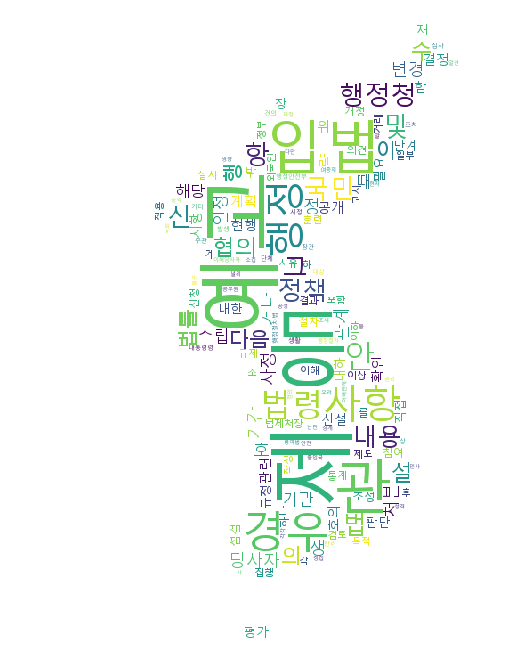

In [66]:
# 시각화한 자료 화면에 출력하기
# 12 * 12 크기로 출력
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()